In [1]:
%matplotlib inline
import pylab as plt
import numpy as np

# Deep Learning for Biomedicine with Keras
## Weight initialization



<img src="./images/segmentation.png" width="30%" align="right">


[*Walter de Back*](http://walter.deback.net)

Institute for Medical Informatics and Biometry (IMB)  
*"Carl Gustav Carus"* Faculty of Medicine  
TU Dresden

[GitLab repo](https://gitlab.com/wdeback/dl-keras-tutorial)

# Table of contents

- Vanishing and exploding gradients
- Donts: zero initialization
- Random initialization
- He, Glorot, Xavier initialization

## Vanishing and exploding gradients

Important problem in training deep networks:
- vanishing or exploding gradients
- due to exponential effect in activation

Historically, this prevented training of deep networks:
- networks were pre-trained layer-by-layer

Partial solution:
- clever initialization of weights


[cs231n](http://cs231n.github.io/neural-networks-2/#init)

[ML mastery](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/)



## Vanishing and exploding gradients

- Example with deep network
  - linear units
  - two neuron per layer
  - weights 1.5 or 0.5
  
[Andrew Ng](https://www.coursera.org/learn/deep-neural-network/lecture/RwqYe/weight-initialization-for-deep-networks)


- 

# All zero

- If data is properly normalized, expectation of trained weight:
  - 50% $w > 0$
  - 50% $w < 0$

- What is we set initial $w=0$?

(-) All neuron get same gradient, same update  
(-) Network cannot learn

- Need to break symmetry

# Small random numbers 

- Initialize input weights per neuron with small random numbers:

  `W = 0.01*np.random.randn(n)` where `n` is number of inputs
  
- Empirically, little difference is found between uniform and normal distribution 
  
(+) Symmetry breaking  

(-) Variance of neuron output grows with number of inputs!



## Calibration of variance

- Normalize variance of neuron’s output to 1 by scaling its weight vector by the square root by number of inputs (fan-in).

- Initialize each weight with small random numbers:

  `w = np.random.randn(n) / np.sqrt(n)`  where `n` is number of inputs

(+) All neurons initially have same output distribution 
(+) Empirically improves rate of convergence


## Glorot initialization

[Glorot](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf) initialization (a.k.a. Xavier initialization):  
  - in case of linear activation (or sigmoid close to zero) 
  - `w = np.random.randn(n) / np.sqrt(2/(n_in + n_out))` 




## Derivation Glorot initialization

Assuming:
  - input $X$ with $n$ element 
  - linear neuron (or close to zero for sigmoid)
  - random weights $W$
  - what is variance of output $Y$?
 
$$Y = W_1X_1+W_2X_2+\ldots+W_nX_n$$

Variance of $W_iX_i$ is (see [wikipedia](https://en.wikipedia.org/wiki/Variance#Product_of_independent_variables)):

$$\text{Var}(W_iX_i) = E[X_i]^2\text{Var}(W_i) + E[W_i]^2\text{Var}(X_i) + \text{Var}(W_i)\text{Var}(X_i)$$

If inputs and weights both have mean $0$, this simplifies to:

$$\text{Var}(W_iX_i) = \text{Var}(W_i)\text{Var}(X_i)$$

If we assume that $X_i$ and $W_i$ are iid, variance of $Y$ is

$$\text{Var}(Y)=\text{Var}(W_1X_1+W_2X_2+\ldots+W_nX_n)=n\text{Var}(W_i)\text{Var}(X_i)$$

I.e.: variance of output $Y$ is the variance of input $X$, scaled by $n\text{Var}(W_i)$. 

Thus: if we want $\text{Var}(Y)=\text{Var}(X)$, we need $n\text{Var}(W_i) = 1$. This implies the variace of the weights should be:

$$\text{Var}(W_i) = \frac{1}{n} = \frac{1}{n_{in}}$$

Also taking into account backpropagation, Glorot and Bengio derive:

$$\text{Var}(W_i) = \frac{2}{n_{in} + n_{out}}$$

Source: [Andy Jones' blog](http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization)

## He initialization

[He](http://arxiv-web3.library.cornell.edu/abs/1502.01852) initialization:  
  - in case of ReLU activation function: $$\text{Var}(W_i) = \frac{2}{n_{in}}$$
  - makes sense: relu is zero for half of its input, so size of weight variance need to be doubled to keep the signal’s variance constant

  - `w = np.random.randn(n) / np.sqrt(2/n_in)` 
  - current recommendation for initialization


## More info


- [Andrew Ng' video](https://www.coursera.org/learn/deep-neural-network/lecture/RwqYe/weight-initialization-for-deep-networks)
- [Andy Jones blog post](http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization)
- [ML mastery](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/)

Papers:
- [Glorot](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf) paper 
- [He](http://arxiv-web3.library.cornell.edu/abs/1502.01852) paper


# Example

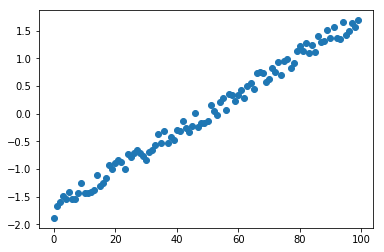

In [295]:
# generate input data
n    = 100
maxi = 10.0
X = np.random.random(n) +  np.arange(start=0,stop=maxi,step=maxi/n)

# standardize input data
X -= X.mean()
X /= X.std()

# plot input
plt.plot(X, 'o')

# output is equal to input
Y = np.power(X, 2)

Define a narrow deep neural network model, e.g. 10 layers with each layer only 2 neurons. 



In [296]:
from keras import models
from keras import layers

activation     = 'linear'
initialization = 'ones' #'glorot_normal' #'random_uniform' # 'zeros' #'ones' #'glorot_normal'
nb_units       = 2
nb_layers      = 10

# input layer
i = layers.Input(shape=(1,))
x = i
# hidden layers with linear activation, different weights initializations
for l in range(nb_layers):
    x = layers.Dense(nb_units, activation=activation, use_bias=False, kernel_initializer=initialization)(x)
# output layer
o = layers.Dense(1, activation=activation, use_bias=False, kernel_initializer=initialization)(x)
model = models.Model(inputs=[i], outputs=[o])
model.compile(loss='mse', optimizer='sgd')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_52 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
dense_547 (Dense)            (None, 2)                 2         
_________________________________________________________________
dense_548 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_549 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_550 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_551 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_552 (Dense)            (None, 2)                 4         
__________

In [297]:
import keras.backend as K
def get_activations(model, layer, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()], [model.layers[layer].output,])
    return get_activations([X_batch,0])

def get_batch(X, Y, batch_size=4):
    samples = np.random.randint(0, len(X), size=batch_size)
    return (X[samples], Y[samples])

In [298]:
np_epochs  = 10
batch_size = 24
weights_epochs = []
for n in range(np_epochs):
    
    loss = 0.0
    for i in range(len(X)//batch_size):
        (x, y) = get_batch(X, Y, batch_size)
        loss += model.train_on_batch(x=x, y=y)
    print(loss)
    
    weights = get_activations(model, 3, np.expand_dims(X[:1], 0))[0][0]
    #print(weights)
    weights_epochs.append( weights )

print(weights_epochs)
_ = plt.plot( weights_epochs )


nan
nan
nan
nan
nan


KeyboardInterrupt: 